# バンドパスフィルタを調査する

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,2)
import numpy as np
from scipy.io.wavfile import read
import scipy.signal as signal

[Text(0.5, 0, 'Frequency[Hz]'),
 Text(0, 0.5, 'Amplitude[Pa]'),
 (20.0, 20000.0),
 None]

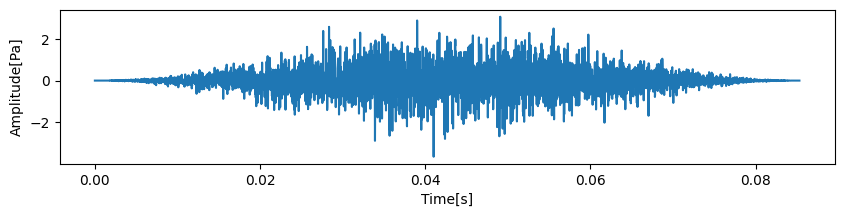

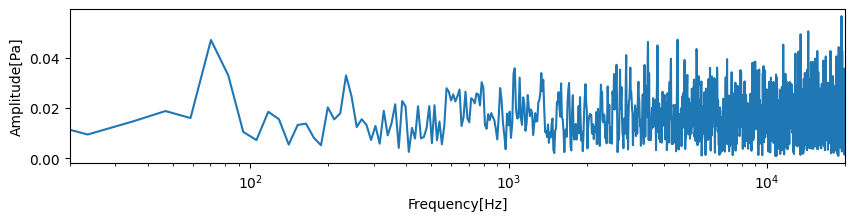

In [17]:
fs = 48000
data = np.random.randn(4096) * np.hanning(4096)
spec = np.fft.rfft(data,n=4096,norm='forward')
spec[1:] *= 2
spec = np.abs(spec)

time = np.arange(len(data))/fs
freq = np.fft.rfftfreq(n=4096,d=1/fs)

_,ax = plt.subplots()
ax.plot(time,data)
ax.set(xlabel='Time[s]',ylabel='Amplitude[Pa]')

_,ax = plt.subplots()
ax.plot(freq,spec)
ax.set(xlabel='Frequency[Hz]',ylabel='Amplitude[Pa]',xlim=[20,20000],xscale='log')

# 今やってるやつ

設計された次数は 7 です。


[Text(0.5, 0, 'Frequency[Hz]'),
 (10.0, 25187.4),
 None,
 Text(0, 0.5, 'Gain[dB]'),
 (-120.0, 10.0)]

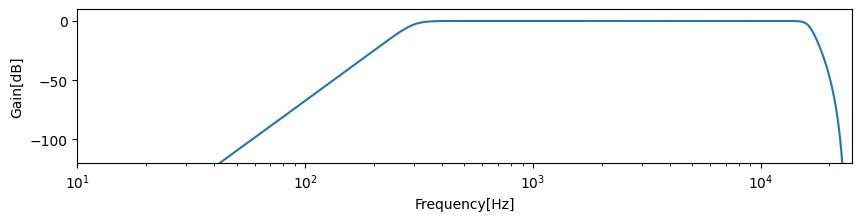

In [55]:
f_nyquist = fs/2
f_min = 300
f_max = 16000
f_pass = np.array([f_min, f_max])
f_stop = np.array([f_min/2, f_max*1.5])

w_pass = f_pass/f_nyquist
g_pass = 3

w_stop = f_stop/f_nyquist
g_stop = 40

try:
    order, w_norm = signal.buttord(w_pass, w_stop, g_pass, g_stop)
    if order < 0:
        raise ValueError(f"設計された次数は負の値 ({order}) です。フィルタパラメータを確認してください。")
    print(f"設計された次数は {order} です。")
    b, a = signal.butter(order, w_norm, "band")
except ValueError as e:
    print(e)
    
w, h = signal.freqz(b, a, worN=2000)
f_axis = w*f_nyquist / np.pi

_,ax = plt.subplots()
ax.plot(f_axis, 20*np.log10(np.abs(h)))
ax.set(xlabel='Frequency[Hz]',
       xlim=[10,None],
       xscale='log',
       ylabel='Gain[dB]',
       ylim=[-120,10],
       )


[Text(0.5, 0, 'Frequency[Hz]'),
 Text(0, 0.5, 'Amplitude[Pa]'),
 (20.0, 20000.0),
 None]

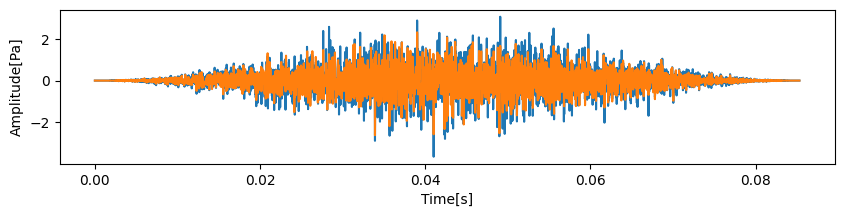

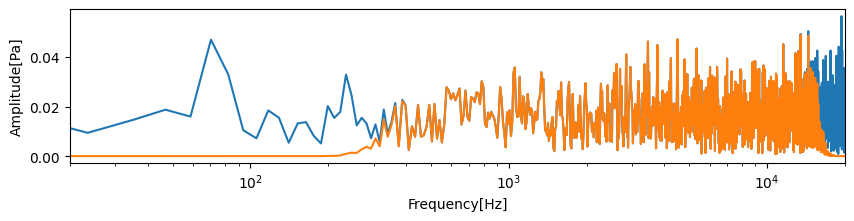

In [48]:
filtered_data = signal.filtfilt(b, a, data)

filtered_spec = np.fft.rfft(filtered_data,n=4096,norm='forward')
filtered_spec[1:] *= 2
filtered_spec = np.abs(filtered_spec)

_,ax = plt.subplots()
ax.plot(time,data)
ax.plot(time,filtered_data)
ax.set(xlabel='Time[s]',ylabel='Amplitude[Pa]')

_,ax = plt.subplots()
ax.plot(freq,spec)
ax.plot(freq,filtered_spec)
ax.set(xlabel='Frequency[Hz]',ylabel='Amplitude[Pa]',xlim=[20,20000],xscale='log')

# orderとカットオフで定義する

[Text(0.5, 0, 'Frequency[Hz]'),
 Text(0, 0.5, 'Amplitude[Pa]'),
 (20.0, 20000.0),
 None]

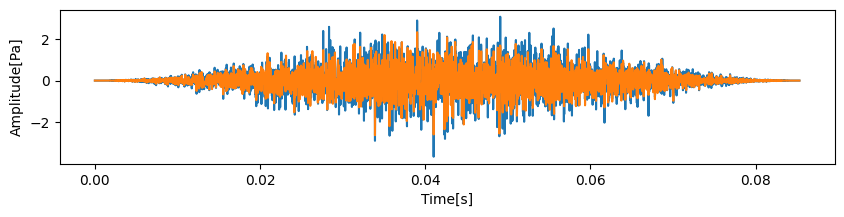

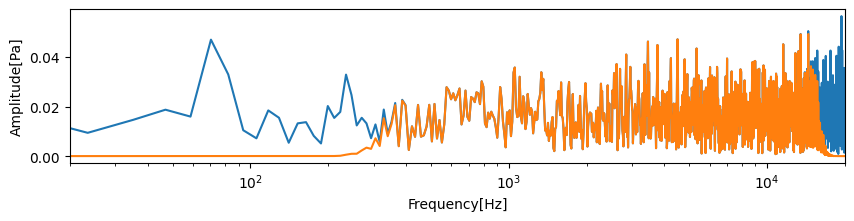

In [54]:
b, a = signal.butter(8, [300,16000], "band",fs=fs)
filtered_data = signal.filtfilt(b, a, data)

filtered_spec = np.fft.rfft(filtered_data,n=4096,norm='forward')
filtered_spec[1:] *= 2
filtered_spec = np.abs(filtered_spec)

_,ax = plt.subplots()
ax.plot(time,data)
ax.plot(time,filtered_data)
ax.set(xlabel='Time[s]',ylabel='Amplitude[Pa]')

_,ax = plt.subplots()
ax.plot(freq,spec)
ax.plot(freq,filtered_spec)
ax.set(xlabel='Frequency[Hz]',ylabel='Amplitude[Pa]',xlim=[20,20000],xscale='log')